In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from netCDF4 import Dataset

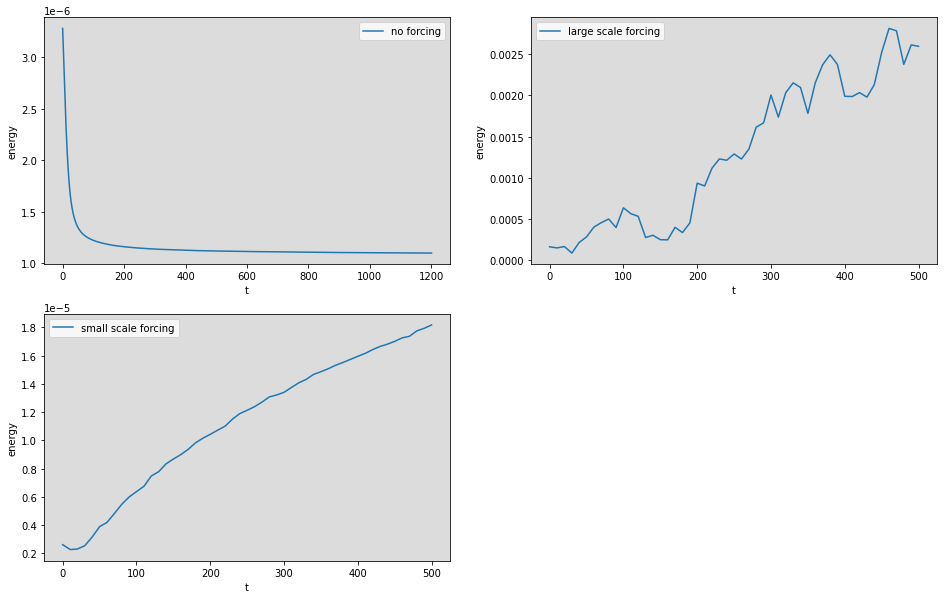

In [9]:
#########
ncfile = '/home/gula/data/fluid2d/fd_00/fd_00_diag.nc'

nc = Dataset(ncfile,'r')
ke_nof=nc.variables['ke'][:]
t_nof=nc.variables['t'][:]
nc.close()

fig=plt.figure(figsize=(16.,10.))
ax1 = fig.add_subplot(221,facecolor='Gainsboro')     
plt.plot(t_nof,ke_nof)
plt.xlabel('t')
plt.ylabel('energy')
plt.legend(['no forcing'])

#########


ncfile = '/home/gula/data/fluid2d/turb2d_forced_ls/turb2d_forced_ls_diag.nc'


nc = Dataset(ncfile,'r')
ke_f=nc.variables['ke'][:]
t_f=nc.variables['t'][:]
nc.close()

ax2 = fig.add_subplot(222,facecolor='Gainsboro')   
ax2.plot(t_f,ke_f)
ax2.set_xlabel('t')
ax2.set_ylabel('energy')
ax2.legend(['large scale forcing'])

#########

ncfile = '/home/gula/data/fluid2d/turb2d_forced_ss/turb2d_forced_ss_diag.nc'


nc = Dataset(ncfile,'r')
ke_f=nc.variables['ke'][:]
t_f=nc.variables['t'][:]
nc.close()

ax2 = fig.add_subplot(223,facecolor='Gainsboro')   
ax2.plot(t_f,ke_f)
ax2.set_xlabel('t')
ax2.set_ylabel('energy')
ax2.legend(['small scale forcing'])



In [41]:
# Define some FFT functions

###################################################################################

from scipy import fftpack


# for 1d spectra

def myfft(u,dx=1):
    ny,nx = u.shape[0],u.shape[1]
    k = np.fft.rfftfreq(u.shape[0],dx)[:]*1000./(2*np.pi)# in cpkm
    dk = k[1]-k[0]
    PSD = np.abs(np.fft.rfft((u[:,0])*np.hanning(ny))[:]**2)/ny/nx/dk
    
    for ix in range(1,nx):
        PSD += np.abs(np.fft.rfft((u[:,ix])*np.hanning(ny))[:]**2)/ny/nx/dk
    return k,PSD


def plot_psd1d(var,dx):

    # compute and plot PSD(u) for t=0
    f, P = myfft(var[0,:,:],dx=dx)
    plot0, = plt.loglog(f, P,linewidth=5.)

    # compute and plot PSD(u) for t>0
    for it in range(0,len(t),1):
        f, P =myfft(var[it,:,:],dx=dx)
        plt.loglog(f, P,linewidth=.5)

    plot1, = plt.loglog(f, P,'--',linewidth=5)
    plot3, = plt.loglog(f, f**(-5/3)*P[1]/f[1]**(-5/3),'--',color='k',linewidth=2)
    plot2, = plt.loglog(f, f**(-3)*P[1]/f[1]**(-3),'-',color='k',linewidth=2)

    plt.grid(b=True, which='both', color='0.65',linestyle='-',linewidth=0.2)
    #plt.axis([1e2, 1e5, 1e-25, 1e-9])
    plt.legend([plot0,plot1,plot2,plot3], ['initial','final',r'$k^{-3}$',                        
                                    r'$k^{-5/3}$'],
                                    bbox_to_anchor=(0.95, 0.95),loc=0, borderaxespad=0.)
    ax1.set_xlabel('k [cpkm]'); 
    ax1.set_ylabel('KE density [m$^2$ s$^{-2}$/cpkm]'); 

    

(121, 128, 128)


/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in power


Text(0.5, 1.0, 'no forcing')

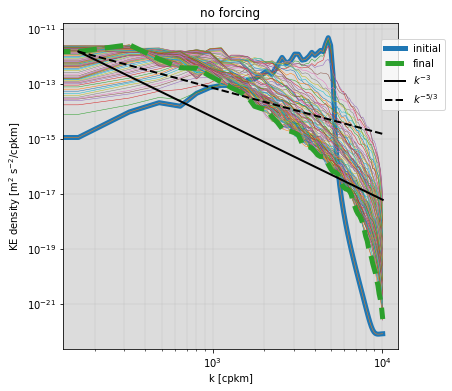

In [42]:

ncfile = '/home/gula/data/fluid2d/fd_00/fd_00_his.nc'
#ncfile = '/home/gula/data/fluid2d/twodimturb_00/twodimturb_00_his.nc'

# get Psi
nc = Dataset(ncfile,'r')
psi=nc.variables['psi'][:]
#vrt=nc.variables['vorticity'][:]
#tracer=nc.variables['tracer'][:]
t=nc.variables['t'][:]
x=nc.variables['x'][:]; dx = x[1] - x[0]
y=nc.variables['y'][:]; dy = y[1] - y[0]
nc.close()

print(psi.shape)

# compute u
#var = psi[:,:,1:]-psi[:,:,:-1]
var = psi[:,1:,:]-psi[:,:-1,:]

# plot PSD
fig=plt.figure(figsize=(6.,6.))
ax1 = fig.add_subplot(111,facecolor='Gainsboro')   
plot_psd1d(var,dy)
plt.title('no forcing')



(26, 128, 128)


/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in power


Text(0.5, 1.0, 'large scale forcing')

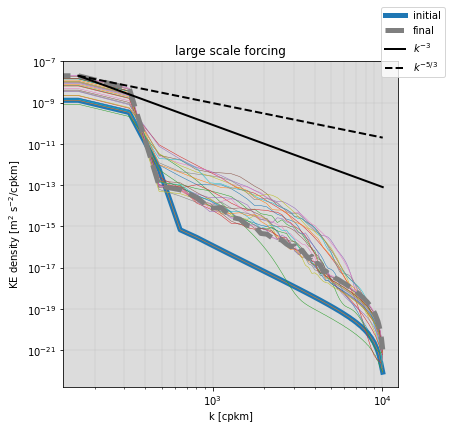

In [43]:

ncfile = '/home/gula/data/fluid2d/turb2d_forced_ls/turb2d_forced_ls_his.nc'

# get Psi
nc = Dataset(ncfile,'r')
psi=nc.variables['psi'][:]
#vrt=nc.variables['vorticity'][:]
#tracer=nc.variables['tracer'][:]
t=nc.variables['t'][:]
x=nc.variables['x'][:]; dx = x[1] - x[0]
y=nc.variables['y'][:]; dy = y[1] - y[0]
nc.close()

print(psi.shape)

# compute u
#var = psi[:,:,1:]-psi[:,:,:-1]
var = psi[:,1:,:]-psi[:,:-1,:]

# plot PSD
fig=plt.figure(figsize=(6.,6.))
ax1 = fig.add_subplot(111,facecolor='Gainsboro')   
plot_psd1d(var,dy)
plt.title('large scale forcing')



(26, 128, 128)


/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in power


Text(0.5, 1.0, 'small scale forcing')

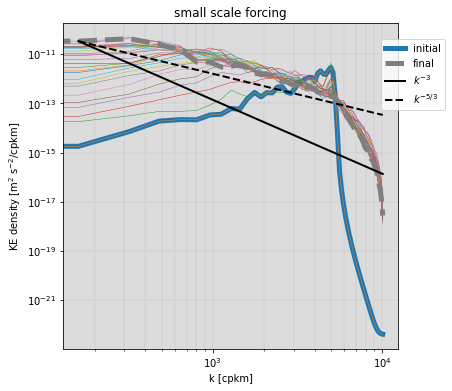

In [44]:

ncfile = '/home/gula/data/fluid2d/turb2d_forced_ss/turb2d_forced_ss_his.nc'

# get Psi
nc = Dataset(ncfile,'r')
psi=nc.variables['psi'][:]
#vrt=nc.variables['vorticity'][:]
#tracer=nc.variables['tracer'][:]
t=nc.variables['t'][:]
x=nc.variables['x'][:]; dx = x[1] - x[0]
y=nc.variables['y'][:]; dy = y[1] - y[0]
nc.close()

print(psi.shape)

# compute u
#var = psi[:,:,1:]-psi[:,:,:-1]
var = psi[:,1:,:]-psi[:,:-1,:]

# plot PSD
fig=plt.figure(figsize=(6.,6.))
ax1 = fig.add_subplot(111,facecolor='Gainsboro')   
plot_psd1d(var,dy)
plt.title('small scale forcing')



# Comparison with 2d spectra


In [70]:

# for 2d spectra

def azimuthalAverage(image, center=None, stddev=False, returnradii=False, return_nr=False,
        binsize=1, weights=None, steps=False, interpnan=False, left=None, right=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is
             None, which then uses the center of the image (including
             fractional pixels).
    stddev - if specified, return the azimuthal standard deviation instead of the average
    returnradii - if specified, return (radii_array,radial_profile)
    return_nr   - if specified, return number of pixels per radius *and* radius
    binsize - size of the averaging bin.  Can lead to strange results if
        non-binsize factors are used to specify the center and the binsize is
        too large
    weights - can do a weighted average instead of a simple average if this keyword parameter
        is set.  weights.shape must = image.shape.  weighted stddev is undefined, so don't
        set weights and stddev.
    steps - if specified, will return a double-length bin array and radial
        profile so you can plot a step-form radial profile (which more accurately
        represents what's going on)
    interpnan - Interpolate over NAN values, i.e. bins where there is no data?
        left,right - passed to interpnan; they set the extrapolated values

    If a bin contains NO DATA, it will have a NAN value because of the
    divide-by-sum-of-weights component.  I think this is a useful way to denote
    lack of data, but users let me know if an alternative is prefered...
   
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)
    if center is None:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
    r = np.hypot(x - center[0], y - center[1])
    if weights is None:
        weights = np.ones(image.shape)
    elif stddev:
        raise ValueError("Weighted standard deviation is not defined.")
    # the 'bins' as initially defined are lower/upper bounds for each bin
    # so that values will be in [lower,upper)  
    nbins = np.int((np.round(r.max() / binsize)+1))
    maxbin = nbins * binsize
    bins = np.linspace(0,maxbin,nbins+1)
    # but we're probably more interested in the bin centers than their left or right sides...
    bin_centers = (bins[1:]+bins[:-1])/2.0
    # Find out which radial bin each point in the map belongs to
    whichbin = np.digitize(r.flat,bins)
    # how many per bin (i.e., histogram)?
    # there are never any in bin 0, because the lowest index returned by digitize is 1
    nr = np.bincount(whichbin)[1:]
    # recall that bins are from 1 to nbins (which is expressed in array terms by arange(nbins)+1 or xrange(1,nbins+1) )
    # radial_prof.shape = bin_centers.shape
    if stddev:
        radial_prof = np.array([image.flat[whichbin==b].std() for b in range(1,nbins+1)])
    else:
        # add renormalization (2pi/k/n)
        #norm = np.array([weights.flat[whichbin==b].sum() for b in xrange(1,np.int(nbins)+1)])  
        #norm_k = np.array([2*np.pi*(b) for b in xrange(1,np.int(nbins)+1)])       
        radial_prof = np.array([(image*weights).flat[whichbin==b].sum() / weights.flat[whichbin==b].sum() * 2*np.pi*b for b in range(1,np.int(nbins)+1)])  
        #or not
        #radial_prof = np.array([(image*weights).flat[whichbin==b].sum() for b in xrange(1,np.int(nbins)+1)])        
    #import pdb; pdb.set_trace()
    if interpnan:
        radial_prof = np.interp(bin_centers,bin_centers[radial_prof==radial_prof],radial_prof[radial_prof==radial_prof],left=left,right=right)
    if steps:
        xarr = np.array(zip(bins[:-1],bins[1:])).ravel()
        yarr = np.array(zip(radial_prof,radial_prof)).ravel()
        return xarr,yarr
    elif returnradii:
        return bin_centers,radial_prof
    elif return_nr:
        return nr,bin_centers,radial_prof
    else:
        return radial_prof


########################


def myfft_2d(myvar,dx=1):
    han = np.sqrt(np.outer(np.hanning(myvar.shape[0]),np.hanning(myvar.shape[1])))
    F1 = fftpack.fft2(myvar*han)  
    psd2D = fftpack.fftshift(np.abs(F1*np.conj(F1)))/(myvar.shape[0]*myvar.shape[1])
    fftemp = azimuthalAverage(psd2D)[:myvar.shape[0]//2+myvar.shape[0]%2]
    ####
    nx1 = np.int(myvar.shape[0]); 
    f = np.arange(nx1/2)/(dx*nx1)*1000./(2*np.pi)# in cpkm
    df = f[2] - f[1]
    fftemp /= df
    return f,fftemp


########################

def plot_psd2d(var,dx):

    # compute and plot PSD(u) for t=0
    f, P = myfft_2d(var[0,:,:],dx=dx)
    plot0, = plt.loglog(f, P,linewidth=5.)

    # compute and plot PSD(u) for t>0
    for it in range(0,len(t),1):
        f, P =myfft_2d(var[it,:,:],dx=dx)
        plt.loglog(f, P,linewidth=.5)

    plot1, = plt.loglog(f, P,'--',linewidth=5)
    plot3, = plt.loglog(f, f**(-5/3)*P[1]/f[1]**(-5/3),'--',color='k',linewidth=2)
    plot2, = plt.loglog(f, f**(-3)*P[1]/f[1]**(-3),'-',color='k',linewidth=2)

    plt.grid(b=True, which='both', color='0.65',linestyle='-',linewidth=0.2)

    plt.legend([plot0,plot1,plot2,plot3], ['initial','final',r'$k^{-3}$',                        
                                    r'$k^{-5/3}$'],
                                    bbox_to_anchor=(0.95, 0.95),loc=0, borderaxespad=0.)
    ax1.set_xlabel('k [cpkm]'); 
    ax1.set_ylabel('KE density [m$^2$ s$^{-2}$/cpkm]'); 

    ########################

def plot_psd2d_2vars(var1,var2,dx):

    # compute and plot PSD(u) for t=0
    f, P = myfft_2d(var1[0,:,:],dx=dx)
    f, P2 = myfft_2d(var2[0,:,:],dx=dx)
    plot0, = plt.loglog(f, P+P2,linewidth=5.)
    
    # compute and plot PSD(u) for t=-1
    f, P = myfft_2d(var1[-1,:,:],dx=dx)
    f, P2 = myfft_2d(var2[-1,:,:],dx=dx)
    plot1, = plt.loglog(f, P+P2,'--',linewidth=5)
    
    plot3, = plt.loglog(f, f**(-5/3)*P[1]/f[1]**(-5/3),'--',color='k',linewidth=2)
    plot2, = plt.loglog(f, f**(-3)*P[1]/f[1]**(-3),'-',color='k',linewidth=2)

    plt.grid(b=True, which='both', color='0.65',linestyle='-',linewidth=0.2)

    plt.legend([plot0,plot1,plot2,plot3], ['initial','final',r'$k^{-3}$',                        
                                    r'$k^{-5/3}$'],
                                    bbox_to_anchor=(0.95, 0.95),loc=0, borderaxespad=0.)
    ax1.set_xlabel('k [cpkm]'); 
    ax1.set_ylabel('KE density [m$^2$ s$^{-2}$/cpkm]'); 
    return f



/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:134: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in power
/home/gula/.virtualenvs/paragridded/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in power


0.0078125


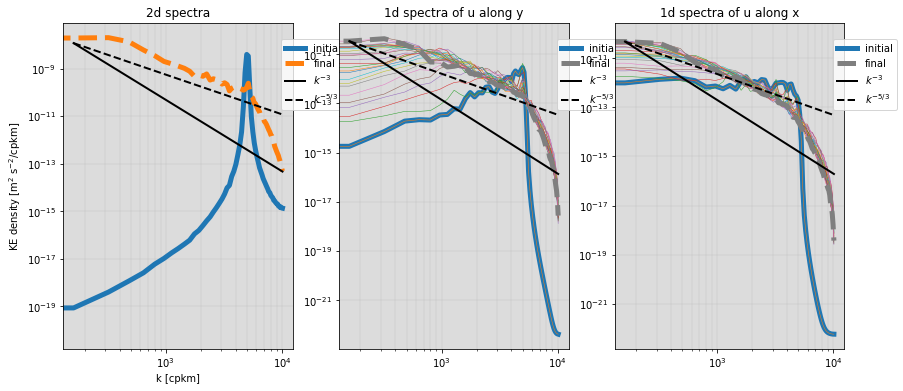

In [72]:
ncfile = '/home/gula/data/fluid2d/turb2d_forced_ss/turb2d_forced_ss_his.nc'


# get Psi
nc = Dataset(ncfile,'r')
psi=nc.variables['psi'][:]
#vrt=nc.variables['vorticity'][:]
#tracer=nc.variables['tracer'][:]
t=nc.variables['t'][:]
nc.close()

# compute u
#var = psi[:,:,1:]-psi[:,:,:-1]
var = psi[:,1:,1:]-psi[:,:-1,1:]
var2 = psi[:,1:,1:]-psi[:,1:,:-1]

# plot PSD
fig=plt.figure(figsize=(14.,6.))
ax1 = fig.add_subplot(131,facecolor='Gainsboro')   
f = plot_psd2d_2vars(var,var2,dy)
plt.title('2d spectra')

ax2 = fig.add_subplot(132,facecolor='Gainsboro')   
plot_psd1d(var,dy)
plt.title('1d spectra of u along y')

ax2 = fig.add_subplot(133,facecolor='Gainsboro')   
plot_psd1d(var2,dy)
plt.title('1d spectra of u along x')

print(dy)

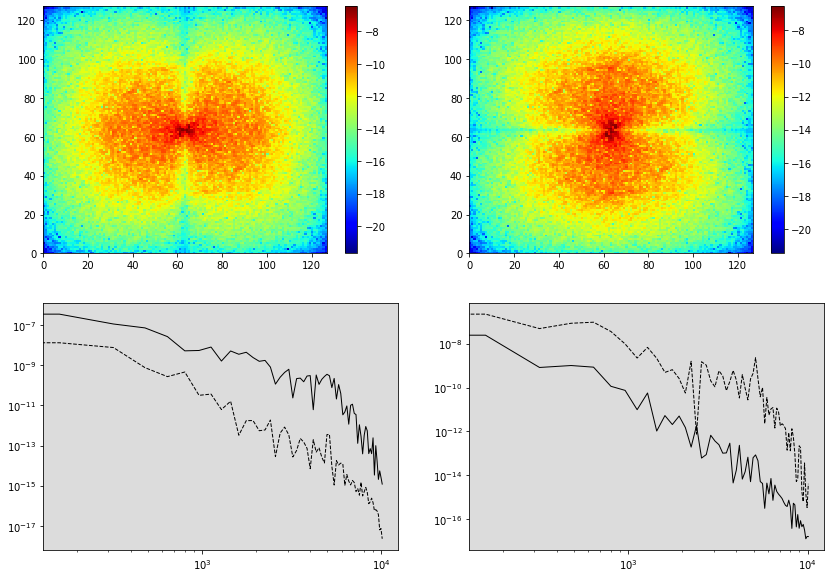

In [73]:
# compute and plot PSD(u) for t=0
u = var[-1,:,:]
v = var2[-1,:,:]
k = f
###########

fig=plt.figure(figsize=(14.,10))
ax = fig.add_subplot(221,facecolor='Gainsboro')   
    
han = np.sqrt(np.outer(np.hanning(u.shape[0]),np.hanning(u.shape[1])))
F1 = fftpack.fft2(u*han)
psdu = fftpack.fftshift(np.abs(F1*np.conj(F1)))/(u.shape[0]*u.shape[1])
plt.pcolormesh(np.log10(psdu).T, cmap=plt.get_cmap('jet')); plt.colorbar()

#####

ax = fig.add_subplot(222,facecolor='Gainsboro')   
    
han = np.sqrt(np.outer(np.hanning(u.shape[0]),np.hanning(u.shape[1])))
F1 = fftpack.fft2(v*han)
psdv = fftpack.fftshift(np.abs(F1*np.conj(F1)))/(u.shape[0]*u.shape[1])
plt.pcolormesh(np.log10(psdv).T, cmap=plt.get_cmap('jet')); plt.colorbar()
#plt.pcolormesh(fftpack.fft2(u))

#####

ax = fig.add_subplot(223,facecolor='Gainsboro')   
    
plt.loglog(k, psdu[u.shape[0]//2:,u.shape[1]//2],'-',color='k',linewidth=1);
plt.loglog(k, psdu[u.shape[0]//2,u.shape[1]//2:],'--',color='k',linewidth=1);

#####

ax = fig.add_subplot(224,facecolor='Gainsboro')   
    
plt.loglog(k, psdv[v.shape[0]//2:,v.shape[1]//2],'-',color='k',linewidth=1);
plt.loglog(k, psdv[v.shape[0]//2,v.shape[1]//2:],'--',color='k',linewidth=1);



In [50]:
var.shape

(26, 128, 128)

In [53]:
F1

array([[ 0.74250449-0.j        , -0.55718501+1.3552356j ,
         0.19127226-0.39349924j, ..., -0.21395659+0.05541198j,
         0.19127226+0.39349924j, -0.55718501-1.3552356j ],
       [-0.71021118-1.54073515j,  0.12344168+0.09887467j,
        -0.01596814+0.10436732j, ...,  0.00684307-0.13539405j,
        -0.22578872-0.02322588j,  0.70065095+1.24601779j],
       [ 0.16065767+0.60020031j,  0.06965244-0.61044356j,
         0.08285899+0.66590219j, ..., -0.02956193+0.11937583j,
         0.2783975 +0.13245709j, -0.34972434-0.55471837j],
       ...,
       [ 0.21175968+0.11904289j, -0.06047749-0.29323083j,
        -0.14383074+0.12220798j, ...,  0.08686427-0.06421536j,
        -0.10366808+0.19190737j, -0.01531049-0.06316686j],
       [ 0.16065767-0.60020031j, -0.34972434+0.55471837j,
         0.2783975 -0.13245709j, ..., -0.24681509+0.33471544j,
         0.08285899-0.66590219j,  0.06965244+0.61044356j],
       [-0.71021118+1.54073515j,  0.70065095-1.24601779j,
        -0.22578872+0.02322588